# Churn Prediction for Investment Banking

## What is churn?
Churn Prediction is an important problem that is beneficial for a number of companies.
In companies such as Netflix where your major revenue is dependent on customer retention it is very important to identify customers who are most likely to leave/unsubsribe from your service and more over find the factors leading to churn.

## What causes churn?

This the question we are trying to answer. While there maybe numerous reasons why a customer decides to stop using services. It is possible to find patterns in factors/features pertaining to each to be able to predict churn.

## Use of predicting churn

It would be most beneficial to understand that if a group of customers who are depending on a certain service is causing and issue. Predicting the group of users and their common attribute could help triangulate the source of problem and eliminate it before churn.

## Churn in Investment Banking

For an investment banking company (in this dataset) we shall define churn as the number users who stop using your services/drop below significant usage for more than 28 days. This group of customers may not necessarily stop using your services but on a free tier subscription it would be beneficial to know who were most likely stop investing significant amount of funds onto your platform.

## Predictive task

The Prediction task is that of classification, i.e. given certain set of attributes of a customer such as Customer's joining date, subscription type, amount spent on services and other such data predict whether or not a customer is most likely to churn.

**Before we start predicting** we need to identify the customers who are classified in either "Churned/Not Churned". 

We define this as any user who invests 10 dollars or less for atleast 28 days continously after the user has previously invested more than 10 dollars i.e. If user starts of smaller than 10 dollars and then increases investment higher than 10 dollars we do not consider this as churn. Only when the user has invested greater than 10 dollars then dips below 10 dollars we consider it as churn.

In investment history dataset we have a list of customers and their prior record of activities along with their timestamp:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample

In [2]:
history_data = pd.read_csv("investment_history.csv")

Let's **explore** the data and see what we are working with

In [3]:
history_data.head()

,timestamp,amount,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


History data's timestamp are string, we will need to convert these datetime variable to perform date arithmetic

In [4]:
from dateutil import parser
history_data['timestamp'] = [parser.parse(datestring) for datestring in history_data.timestamp.to_numpy()]

In [5]:
# first row < second row < last row
history_data.timestamp.iloc[0] < history_data.timestamp.iloc[1] < history_data.timestamp.iloc[-1]

True

### Customer starting off at 10 Dollars: Not Churn

<AxesSubplot:xlabel='timestamp', ylabel='amount'>

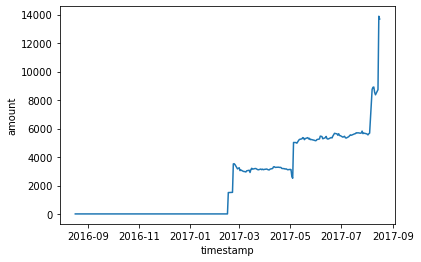

In [6]:
sns.lineplot(x="timestamp", y="amount", data=history_data[history_data['user_id'] == "3da247b336810bb14c8cba5d9784ffbb"])

### Customer dips below 10 dollars for more than 28 days: Churn

<AxesSubplot:xlabel='timestamp', ylabel='amount'>

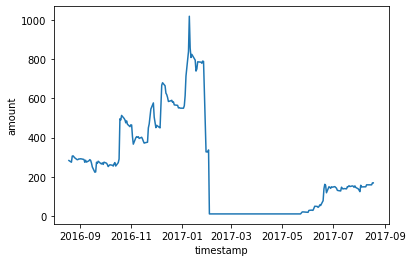

In [7]:
sns.lineplot(x="timestamp", y="amount", data=history_data[history_data['user_id'] == "d703ee629b909b767957a7c02e9440f8"])

### Possible Customer Churn

In the following graph All lines have amount value less than 10 but only some go below 10 from a higher amount

In [8]:
possible_churn = ['07ee5bf682719b00115e92fcf4fddb8f', '08b9ecc05b524a3de99ce3b635518ba1', '0e469b74e2911549005bb6160074735a', '0f9505e31bcfba9e40adb71914e159ea', '147251e571c44cd4c412bd453329d007', '194f694113a2bbe6b9579cda151de38e', '22a7ccfffe68bc17f1b9d852256d6e11', '248fd3984cef3e085700fcb24f9b1a01', '264a63dd89fb2a0718608c42ababebbc', '28931128bb189f9e0ed7b465c1c6bfdf', '2af180e2c0b5e4f3c47863057d795b02', '3bcce579a525724a37cf6e9fd600bda9', '3da247b336810bb14c8cba5d9784ffbb', '3e3810f736cb08a091a43bf10b022fee', '4cec2f60c0cac2cd80a4faded6561693', '4e66293da878a10bd933672a99529b62', '506f3838d862b2a3b604da914bc26ce5', '655a3a214e88a7e520c58da80a2d9fcf', '6b7bc494bac2b0cbcbd367ee29a66c29', '7a120fb746358323cc350737d1affeb3', '7ae7f70a79a598e9bd3061594022436a', '7ae7f70a79a598e9bd3061594022436a', '7ae7f70a79a598e9bd3061594022436a', '7ae7f70a79a598e9bd3061594022436a', '7ae7f70a79a598e9bd3061594022436a', '7ae7f70a79a598e9bd3061594022436a', '7c443462124c1f0340f8979073575165', '7ece982d8f3e80817b8e0e67e52e1f4a', '7f173c66467dd6e4205688daf202ac8c', '80041bb3cf3074aa4e53410e6cf8ba0b', '88aa014aee1a11189897c975301c34d4', '8d34a9878677b377c6aa86297cf5691e', '8ea3c04d18432430d55bdc2cc5442b63', '91065d91cdcf939e3dd9009126b78827', 'a0ec89299d26ead17bbc5dffe778dba9', 'a18b4a7218e5ef7e6200fc280cf08864', 'a38e9edc394e282bbacf1a67fa454512', 'a57f3090e34a6dc3d0fd7cc4d5779f15', 'a5a007027c322796442c5576f0a68455', 'b85f175967d84e06b3fcc3ce94f45452', 'c565e81b9aeb1221821962b52f314858', 'c9436ddff9597cc8b3fba20e6c4c04bd', 'd703ee629b909b767957a7c02e9440f8', 'd7d05bd829b809df1859fdd19ac43ed6', 'e1d39ed17bc546c028ac66ab5bee2db1', 'e40991f1a148fb2972a5a570e9b51f35', 'f9ced9cba5ebf69e14afd1cdde6a8670', 'fc32f6b78b941ce7658fb177eeab5d10'] 
sns.set(rc={'figure.figsize':(8,8)})

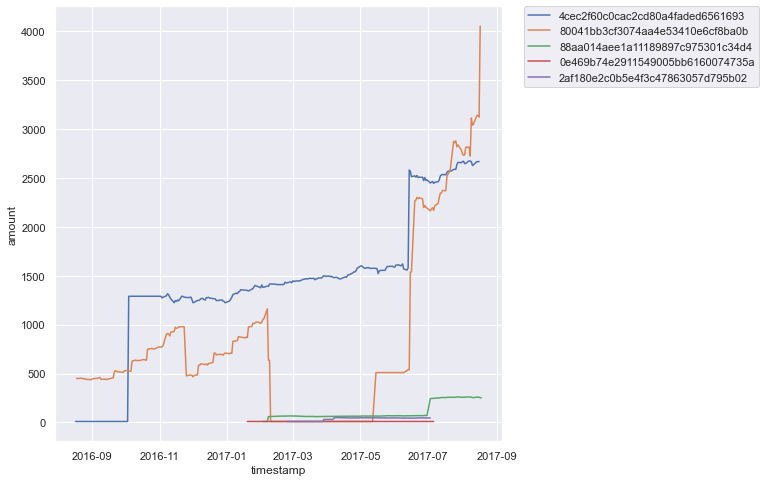

In [9]:
sns.lineplot(x="timestamp", y="amount", data=history_data[(history_data.user_id.isin(sample(possible_churn,5)))], hue="user_id", )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [10]:
history_data.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,1119158.0,3976.953266,13085.903764,10.0,111.54,578.74,2564.56,478948.41


In [11]:
history_data.user_id.value_counts().head()

8ac27ef7237f422d2d059632d2c4507b    252
bd4d07350243b95503fe0cc211930caa    252
15750a729d41f5435185aa67f3cd2546    252
99b17458425108ec85f8be21566c8e74    252
d9e378fa3774636275e4f042135ea35b    252
Name: user_id, dtype: int64

### Detecting churn using group by function
Churn is marked as follows:
#### history_data is grouped for every user --> userdf

In [12]:
userdf = history_data[history_data.user_id == "3da247b336810bb14c8cba5d9784ffbb"]
userdf.head()

,timestamp,amount,user_id
109404,2016-08-17 00:00:00+00:00,10.0,3da247b336810bb14c8cba5d9784ffbb
109405,2016-08-18 00:00:00+00:00,10.0,3da247b336810bb14c8cba5d9784ffbb
109406,2016-08-19 00:00:00+00:00,10.0,3da247b336810bb14c8cba5d9784ffbb
109407,2016-08-22 00:00:00+00:00,10.0,3da247b336810bb14c8cba5d9784ffbb
109408,2016-08-23 00:00:00+00:00,10.0,3da247b336810bb14c8cba5d9784ffbb


####  userdf is partitioned such that amount is same for the group --> df

In [13]:
for i, group in userdf.groupby([(userdf.amount != userdf.amount.shift()).cumsum()]):
    if i > 2:
        break
    print(group.head())

                       timestamp  amount                           user_id
109404 2016-08-17 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109405 2016-08-18 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109406 2016-08-19 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109407 2016-08-22 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109408 2016-08-23 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
                       timestamp  amount                           user_id
109530 2017-02-16 00:00:00+00:00  1510.0  3da247b336810bb14c8cba5d9784ffbb
109531 2017-02-17 00:00:00+00:00  1510.0  3da247b336810bb14c8cba5d9784ffbb


#### The groups such that the difference between their first and last timestamp is greater than 28 days are marked as churned
Lets have look at the first 2 consecutive groups for user_id 3da247b336810bb14c8cba5d9784ffbb

In [14]:
for i, df in userdf.groupby([(userdf.amount != userdf.amount.shift()).cumsum()]):
    if i > 2:
        break
    print(df.head())
    if df.iloc[0].amount > 10 or df.shape[0] <= 1:
        print(False)
        continue
    end = df.iloc[-1].timestamp
    start = df.iloc[0].timestamp
    if (end-start).days >= 28:
        print(True)
        continue
    print(False)

                       timestamp  amount                           user_id
109404 2016-08-17 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109405 2016-08-18 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109406 2016-08-19 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109407 2016-08-22 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
109408 2016-08-23 00:00:00+00:00    10.0  3da247b336810bb14c8cba5d9784ffbb
True
                       timestamp  amount                           user_id
109530 2017-02-16 00:00:00+00:00  1510.0  3da247b336810bb14c8cba5d9784ffbb
109531 2017-02-17 00:00:00+00:00  1510.0  3da247b336810bb14c8cba5d9784ffbb
False


In [15]:
from itertools import groupby
def check_churn_helper(df):
    if df.iloc[0].amount > 10 or df.shape[0] <= 1:
        return 0
    if (df.iloc[-1].timestamp - df.iloc[0].timestamp).days >= 28:
        return 1
    return 0
def check_churn(userdf):
    if userdf[userdf.amount <= 10].empty:
        return 0
    groups = userdf.groupby([(userdf.amount != userdf.amount.shift()).cumsum()]).apply(check_churn_helper).tolist()
    while 1 in groups:
        i = groups.index(1)
        if 0 in groups[:i]:
            return 1
        else:
            groups = groups[i+1:]
    return 0
    

In [16]:
churn_record = history_data.groupby("user_id").apply(check_churn)

In [17]:
churn_record = churn_record.to_frame(name="churn").reset_index()
churn_record.sample(5)

,user_id,churn
3823,b0976ef10c01fde21605c81c3aeee9df,0
2294,6a53786d8d120a0f6bc05897f6e3d512,0
34,01ef51aa8fab66b13d2249bc6ee68975,0
2330,6bde9fb591f981d0e60bf1b5142c31f7,0
1530,46562eac9519b38218f341a45df54e1a,0


In [18]:
print(churn_record.shape)
churn_record[churn_record.churn == True]

(5584, 2)


,user_id,churn
2321,6b7bc494bac2b0cbcbd367ee29a66c29,1
2768,80041bb3cf3074aa4e53410e6cf8ba0b,1
4682,d703ee629b909b767957a7c02e9440f8,1


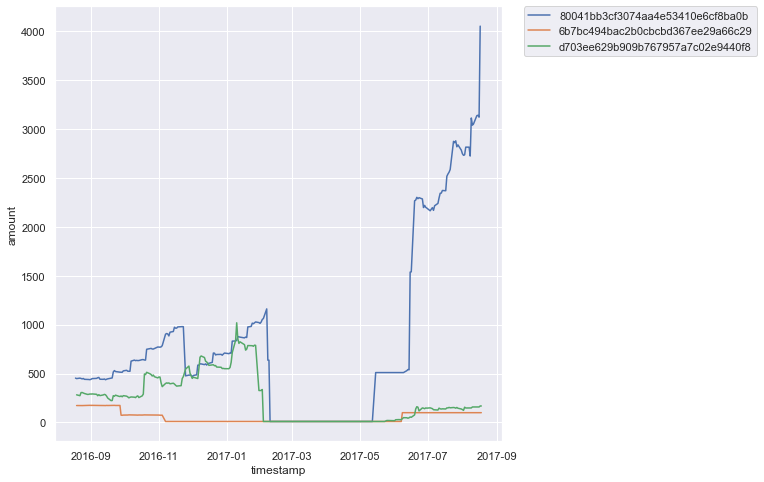

In [19]:
churned_users = churn_record[churn_record.churn == True].user_id.tolist()
sns.lineplot(x="timestamp", y="amount", data=history_data[(history_data.user_id.isin(churned_users))], hue="user_id", )
## Moving legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## We can now add this as a target variable in our customer dataset

In [20]:
data = pd.read_csv("customer.csv")

In [21]:
print(data.shape)
data.head(3).T

(5584, 9)


,0,1,2
risk_tolerance,high_risk_tolerance,med_risk_tolerance,med_risk_tolerance
investment_experience,limited_investment_exp,limited_investment_exp,limited_investment_exp
liquidity_needs,very_important_liq_need,very_important_liq_need,very_important_liq_need
platform,Android,Android,iOS
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,stock,stock,stock
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f


## Merging Dependent and Independent variables

In [22]:
data = data.merge(churn_record, on='user_id', how='inner')

In [23]:
data.head(3).T

,0,1,2
risk_tolerance,high_risk_tolerance,med_risk_tolerance,med_risk_tolerance
investment_experience,limited_investment_exp,limited_investment_exp,limited_investment_exp
liquidity_needs,very_important_liq_need,very_important_liq_need,very_important_liq_need
platform,Android,Android,iOS
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,stock,stock,stock
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0


## Target Variable

In [24]:
data.churn.value_counts()

0    5581
1       3
Name: churn, dtype: int64

We can see that the classification problem is very imbalanced problem. That is, the churn percentage is much smaller than non-churn.

Let's have a look at our predictor variables

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 0 to 5583
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
 9   churn                         5584 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 479.9+ KB


We have two numeric column: 

In [26]:
data.describe()

,time_spent,first_deposit_amount,churn
count,5584.000000,5584.000000,5584.000000
mean,34.509706,633.566805,0.000537
std,155.080551,2118.323263,0.023174
min,0.000000,0.000000,0.000000
25%,2.848908,50.000000,0.000000
50%,13.474708,100.000000,0.000000
75%,33.823829,500.000000,0.000000
max,8788.329450,50000.000000,1.000000


### We do not have Null Values in any of the variable

In [27]:
data.isna().sum()

risk_tolerance                  0
investment_experience           0
liquidity_needs                 0
platform                        0
time_spent                      0
instrument_type_first_traded    0
first_deposit_amount            0
time_horizon                    0
user_id                         0
churn                           0
dtype: int64

### First deposit amount for churned users

In [28]:
sns.set(rc={'figure.figsize':(5,5)})

C:\Users\Ashwin\Anaconda3\envs\infrrd_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


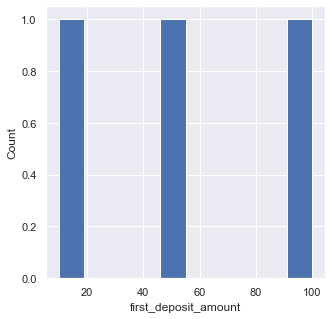

In [29]:
sns.distplot(data[data.churn == True].first_deposit_amount, norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
            ).set(xlabel='first_deposit_amount', ylabel='Count');

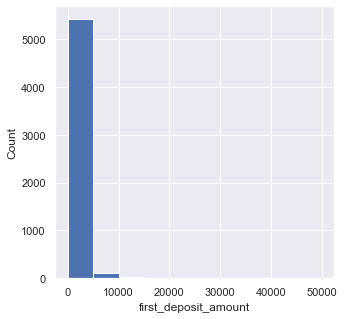

In [30]:
sns.distplot(data[data.churn == False].first_deposit_amount, norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
            ).set(xlabel='first_deposit_amount', ylabel='Count');

#### risk_tolerance

In [31]:
data.risk_tolerance.value_counts()

high_risk_tolerance    3566
med_risk_tolerance     1779
low_risk_tolerance      239
Name: risk_tolerance, dtype: int64

risk_tolerance is an ordinal variable, i.e. low_risk_tolerance < med_risk_tolerance < high_risk_tolerance. There is an order.
We can either treat this as:
* Equally spaced interval data.
    i.e. magnitude of difference tolerance between low and med is the same between med and high
* Nominal data: Categorical data with no ordering: Encode as one-hot encoding

In [32]:
pd.get_dummies(data.risk_tolerance).head()

,high_risk_tolerance,low_risk_tolerance,med_risk_tolerance
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


risk_tolerance can be encoded as:

| tolerance | low | medium | high |
| --- | --- | --- | --- |
| low | 1 | 0 | 0 |
| med | 0 | 1 | 0 |
| high | 0 | 0 | 1 |

third column can be dropped since high: 1 can be represented as low: 0 and med: 0.
This is done to avoid multi-collinearity problem.

We should make sure to choose the value with sufficient frequency (high_risk_tolerance) which can be reference by other variable.

In [33]:
risk_one_hot = pd.get_dummies(data.risk_tolerance)
data = data.join(risk_one_hot)
data = data.drop(['risk_tolerance', 'high_risk_tolerance'],axis = 1)
data.head(3).T

,0,1,2
investment_experience,limited_investment_exp,limited_investment_exp,limited_investment_exp
liquidity_needs,very_important_liq_need,very_important_liq_need,very_important_liq_need
platform,Android,Android,iOS
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,stock,stock,stock
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0
low_risk_tolerance,0,0,0


#### investment_experience

In [34]:
data.investment_experience.value_counts()

limited_investment_exp      2578
no_investment_exp           1796
good_investment_exp         1134
extensive_investment_exp      76
Name: investment_experience, dtype: int64

investment_experience is an ordinal variable, i.e. 

no_investment_exp < limited_investment_exp < good_investment_exp < extensive_investment_exp. 

There is an order.

Similar to risk_tolerance we shall convert investment_experience into one_hot encoding

In [35]:
investment_experience_one_hot = pd.get_dummies(data.investment_experience)
data = data.join(investment_experience_one_hot)
data = data.drop(['investment_experience', 'limited_investment_exp'],axis = 1)
data.head(3).T

,0,1,2
liquidity_needs,very_important_liq_need,very_important_liq_need,very_important_liq_need
platform,Android,Android,iOS
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,stock,stock,stock
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0
low_risk_tolerance,0,0,0
med_risk_tolerance,0,1,1


#### liquidity_needs

In [36]:
data.liquidity_needs.value_counts()

very_important_liq_need        4217
somewhat_important_liq_need    1109
not_important_liq_need          258
Name: liquidity_needs, dtype: int64

liquidity_needs is also converted to one hot encoding

In [37]:
liquidity_needs_one_hot = pd.get_dummies(data.liquidity_needs)
data = data.join(liquidity_needs_one_hot)
data = data.drop(['liquidity_needs', 'very_important_liq_need'],axis = 1)
data.head(3).T

,0,1,2
platform,Android,Android,iOS
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,stock,stock,stock
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0
low_risk_tolerance,0,0,0
med_risk_tolerance,0,1,1
extensive_investment_exp,0,0,0


#### platform

In [38]:
data.platform.value_counts()

iOS        3550
Android    1529
both        505
Name: platform, dtype: int64

In [39]:
platform_one_hot = pd.get_dummies(data.platform)
data = data.join(platform_one_hot)
data = data.drop(['platform', 'iOS'],axis = 1)
data.head(3).T

,0,1,2
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,stock,stock,stock
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0
low_risk_tolerance,0,0,0
med_risk_tolerance,0,1,1
extensive_investment_exp,0,0,0
good_investment_exp,0,0,0


#### instrument_type_first_traded

In [40]:
data.instrument_type_first_traded.value_counts()

stock       4827
etp          383
adr          197
mlp           55
reit          55
cef           20
wrt           16
0             13
rlt            9
lp             8
tracking       1
Name: instrument_type_first_traded, dtype: int64

Since instrument_type_first_traded is mostly stock and the frequency for other values is lower. We shall convert **instrument_type_first_traded** to
* stock
* non-stock

In [41]:
data.loc[~(data.instrument_type_first_traded == "stock"), "instrument_type_first_traded"] = "non-stock"
data.instrument_type_first_traded.value_counts()

stock        4827
non-stock     757
Name: instrument_type_first_traded, dtype: int64

In [42]:
instrument_type_first_traded_dict = {
    "stock": 1,
    "non-stock": 0
}
data = data.replace({"instrument_type_first_traded": instrument_type_first_traded_dict})
data.head(3).T

,0,1,2
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,1,1,1
first_deposit_amount,40.0,200.0,25.0
time_horizon,med_time_horizon,short_time_horizon,long_time_horizon
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0
low_risk_tolerance,0,0,0
med_risk_tolerance,0,1,1
extensive_investment_exp,0,0,0
good_investment_exp,0,0,0


#### time_horizon

In [43]:
data.time_horizon.value_counts()

short_time_horizon    2833
long_time_horizon     1833
med_time_horizon       918
Name: time_horizon, dtype: int64

In [44]:
time_horizon_one_hot = pd.get_dummies(data.time_horizon)
data = data.join(time_horizon_one_hot)
data = data.drop(['time_horizon', 'short_time_horizon'],axis = 1)
data.head(3).T

,0,1,2
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,1,1,1
first_deposit_amount,40.0,200.0,25.0
user_id,895044c23edc821881e87da749c01034,458b1d95441ced242949deefe8e4b638,c7936f653d293479e034865db9bb932f
churn,0,0,0
low_risk_tolerance,0,0,0
med_risk_tolerance,0,1,1
extensive_investment_exp,0,0,0
good_investment_exp,0,0,0
no_investment_exp,0,0,0


user_id will be removed from our list of predictor variable. Since, user_id is unique to each row and does not explain the variance in **churn**.

In [45]:
data = data.drop("user_id", axis=1)
data.head(3).T

,0,1,2
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,1.000000,1.000000,1.000000
first_deposit_amount,40.000000,200.000000,25.000000
churn,0.000000,0.000000,0.000000
low_risk_tolerance,0.000000,0.000000,0.000000
med_risk_tolerance,0.000000,1.000000,1.000000
extensive_investment_exp,0.000000,0.000000,0.000000
good_investment_exp,0.000000,0.000000,0.000000
no_investment_exp,0.000000,0.000000,0.000000
not_important_liq_need,0.000000,0.000000,0.000000


In [46]:
data.head(3).T

,0,1,2
time_spent,33.129417,16.573517,10.008367
instrument_type_first_traded,1.000000,1.000000,1.000000
first_deposit_amount,40.000000,200.000000,25.000000
churn,0.000000,0.000000,0.000000
low_risk_tolerance,0.000000,0.000000,0.000000
med_risk_tolerance,0.000000,1.000000,1.000000
extensive_investment_exp,0.000000,0.000000,0.000000
good_investment_exp,0.000000,0.000000,0.000000
no_investment_exp,0.000000,0.000000,0.000000
not_important_liq_need,0.000000,0.000000,0.000000


## Check Outliers

<AxesSubplot:xlabel='first_deposit_amount', ylabel='time_spent'>

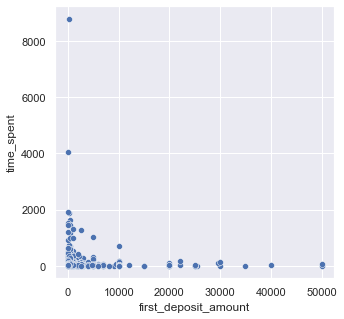

In [47]:
sns.scatterplot(x="first_deposit_amount", y="time_spent", data=data)

#### Time Spent - using Inter Quartile Range

In [48]:
from pprint import pprint
count, mean, std, mini, q1, q2, q3, maxi = data.time_spent.describe()
iqr = q3 - q1
lower_lim = q1 - 2.5*iqr
upper_lim = q3 + 2.5*iqr
pprint(dict(zip("count, mean, std, mini, q1, q2, q3, maxi, iqr, lower, upper".split(", "), [count, mean, std, mini, q1, q2, q3, maxi, iqr, lower_lim, upper_lim])))

{'count': 5584.0,
 'iqr': 30.974920833345003,
 'lower': -74.58839375003251,
 'maxi': 8788.32945,
 'mean': 34.50970563813555,
 'mini': 0.0,
 'q1': 2.84890833333,
 'q2': 13.47470833335,
 'q3': 33.823829166675004,
 'std': 155.0805513376877,
 'upper': 111.26113125003752}


In [49]:
data = data[(data.time_spent > lower_lim) & (data.time_spent < upper_lim)].sort_values(by="time_spent")

In [50]:
data.head(3).T

,4042,2565,736
time_spent,0.0,0.0,0.0
instrument_type_first_traded,1.0,1.0,0.0
first_deposit_amount,1000.0,2000.0,500.0
churn,0.0,0.0,0.0
low_risk_tolerance,0.0,0.0,0.0
med_risk_tolerance,0.0,0.0,0.0
extensive_investment_exp,0.0,0.0,0.0
good_investment_exp,0.0,0.0,0.0
no_investment_exp,0.0,0.0,0.0
not_important_liq_need,0.0,0.0,0.0


#### First Deposity Amount using Inter - Quartile Range

In [51]:
count, mean, std, mini, q1, q2, q3, maxi = data.first_deposit_amount.describe()
iqr = q3 - q1
lower_lim = q1 - 2.5*iqr
upper_lim = q3 + 2.5*iqr
pprint(dict(zip("count, mean, std, mini, q1, q2, q3, maxi, iqr, lower, upper".split(", "), [count, mean, std, mini, q1, q2, q3, maxi, iqr, lower_lim, upper_lim])))

{'count': 5328.0,
 'iqr': 450.0,
 'lower': -1075.0,
 'maxi': 50000.0,
 'mean': 623.1196208708704,
 'mini': 0.0,
 'q1': 50.0,
 'q2': 100.0,
 'q3': 500.0,
 'std': 2073.7389935262213,
 'upper': 1625.0}


In [52]:
data = data[(data.first_deposit_amount > lower_lim) & (data.first_deposit_amount < upper_lim)].sort_values(by="first_deposit_amount")
data.head(5).T

,3377,4930,5373,2474,3441
time_spent,36.39415,63.223983,46.916067,13.56685,100.4927
instrument_type_first_traded,1.00000,0.000000,1.000000,1.00000,1.0000
first_deposit_amount,0.00000,0.000000,0.000000,0.00000,0.0100
churn,0.00000,0.000000,0.000000,0.00000,0.0000
low_risk_tolerance,0.00000,0.000000,0.000000,0.00000,0.0000
med_risk_tolerance,1.00000,1.000000,1.000000,1.00000,0.0000
extensive_investment_exp,0.00000,0.000000,0.000000,0.00000,0.0000
good_investment_exp,0.00000,0.000000,1.000000,0.00000,0.0000
no_investment_exp,1.00000,0.000000,0.000000,1.00000,0.0000
not_important_liq_need,0.00000,0.000000,0.000000,0.00000,0.0000


<AxesSubplot:xlabel='first_deposit_amount', ylabel='time_spent'>

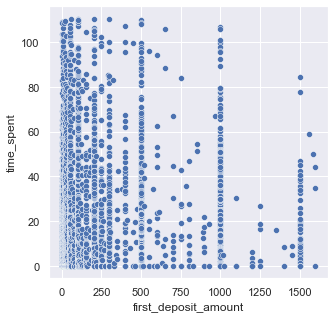

In [53]:
sns.scatterplot(x="first_deposit_amount", y="time_spent", data=data)

## Data Normalization

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['first_deposit_amount', 'time_spent']])

In [55]:
data[['first_deposit_amount', 'time_spent']] = scaled_data

<AxesSubplot:xlabel='first_deposit_amount', ylabel='time_spent'>

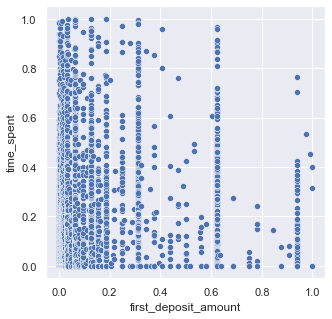

In [56]:
sns.scatterplot(x="first_deposit_amount", y="time_spent", data=data)

In [57]:
data.head().T

,3377,4930,5373,2474,3441
time_spent,0.329321,0.572097,0.424531,0.122763,0.909332
instrument_type_first_traded,1.000000,0.000000,1.000000,1.000000,1.000000
first_deposit_amount,0.000000,0.000000,0.000000,0.000000,0.000006
churn,0.000000,0.000000,0.000000,0.000000,0.000000
low_risk_tolerance,0.000000,0.000000,0.000000,0.000000,0.000000
med_risk_tolerance,1.000000,1.000000,1.000000,1.000000,0.000000
extensive_investment_exp,0.000000,0.000000,0.000000,0.000000,0.000000
good_investment_exp,0.000000,0.000000,1.000000,0.000000,0.000000
no_investment_exp,1.000000,0.000000,0.000000,1.000000,0.000000
not_important_liq_need,0.000000,0.000000,0.000000,0.000000,0.000000


## Two way interaction between variables

In [58]:
X = data.drop("churn", axis=1)
y = data['churn'].tolist()

In [59]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
orig_columns = X.columns
new_columns = list(combinations(orig_columns, 2))
new_column_names = ["_".join(col) for col in new_columns]

In [60]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X = poly.fit_transform(X)

In [61]:
X = pd.DataFrame(X, columns=list(orig_columns) + new_column_names)

In [62]:
X.head().T

,0,1,2,3,4
time_spent,0.329321,0.572097,0.424531,0.122763,0.909332
instrument_type_first_traded,1.000000,0.000000,1.000000,1.000000,1.000000
first_deposit_amount,0.000000,0.000000,0.000000,0.000000,0.000006
low_risk_tolerance,0.000000,0.000000,0.000000,0.000000,0.000000
med_risk_tolerance,1.000000,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...
Android_long_time_horizon,0.000000,0.000000,0.000000,0.000000,0.000000
Android_med_time_horizon,0.000000,0.000000,0.000000,0.000000,0.000000
both_long_time_horizon,0.000000,0.000000,0.000000,0.000000,0.000000
both_med_time_horizon,0.000000,0.000000,0.000000,0.000000,0.000000


## Remove all zero columns

In [63]:
zero_indices = [i for i,x in enumerate(list((df == 0).all())) if x]
X = X.drop(X.columns[zero_indices], axis=1)

Split into training and test set

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Selection

In [65]:
from sklearn.feature_selection import SelectKBest, chi2
select = SelectKBest(chi2, k=20).fit(X_train, y_train)
indices_selected = select.get_support(indices=True)
selected_colnames = [X_train.columns[i] for i in indices_selected]

In [66]:
X_train_selected = X_train[selected_colnames]
X_test_selected = X_test[selected_colnames]

## Model Building

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## ROC Curve - Neural Net

C:\Users\Ashwin\Anaconda3\envs\infrrd_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

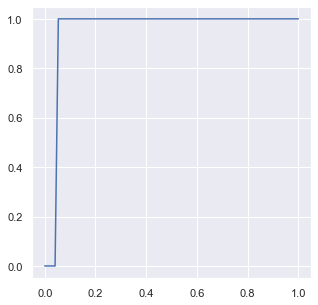

In [68]:
clf = MLPClassifier(alpha=1, max_iter=1000).fit(X_train_selected, y_train)
y_pred_prob = clf.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)
sns.lineplot(fpr, tpr)

## ROC Curve - Logistic Regression

C:\Users\Ashwin\Anaconda3\envs\infrrd_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

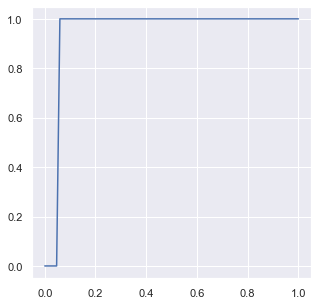

In [69]:
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train_selected, y_train)
y_pred_prob = clf.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)
sns.lineplot(fpr, tpr)

## AUC Score

In [70]:
names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=0),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [71]:
scores = pd.DataFrame(columns=['Model', 'AUC'])
for name, clf in zip(names, classifiers):
    clf = clf.fit(X_train_selected, y_train)
    y_pred_prob = clf.predict_proba(X_test_selected)[:, 1]
    y_pred = clf.predict(X_test_selected)
    auc = roc_auc_score(y_test, y_pred_prob)
    row = {"Model": name, "AUC": auc}
    scores = scores.append(row, ignore_index = True)
scores

C:\Users\Ashwin\Anaconda3\envs\infrrd_env\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Model,AUC
0,Logistic Regression,0.946780
1,Nearest Neighbors,0.498983
2,Linear SVM,0.816949
3,RBF SVM,0.190169
4,Gaussian Process,0.426102
5,Decision Tree,0.478983
6,Random Forest,0.571525
7,Neural Net,0.952881
8,AdaBoost,0.843390
9,Naive Bayes,0.900678
